# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Load bunch data

In [10]:
load_bunch_data = False

In [11]:
if load_bunch_data:
    # We have 7 simulations per scan 
    dd = dict()

    maxi = 30
    turns = range(0, maxi)
    print turns

    folders = []
    folders.append('01_01')
    folders.append('01_02')
    folders.append('01_03')
    folders.append('01_04')
    folders.append('01_05')
    folders.append('01_06')
    folders.append('01_07')

    for fol in folders:
        dd_temp = dict()
        for t in turns:
            if t <= 9:    inputs = str(fol + '/bunch_output/mainbunch_00000' + str(int(t)) + '.mat')
            else:    inputs = str(fol + '/bunch_output/mainbunch_0000' + str(int(t)) + '.mat')
            #print inputs
            dd_temp = add_input_file(dd_temp, inputs, t+1)
        dd_temp = add_input_file(dd_temp, str(fol + '/bunch_output/mainbunch_-000001.mat'), 0)
        dd[int(fol[3:5])] = dd_temp

    print sorted(dd.keys())
    
    # access all particle x co-ordinates like this
    print dd[1][0]['particles']['dE'][0][0][0]

# Load output data

In [12]:
ddo = dict()
ddo = add_input_file(ddo, '03_01/output/output.mat', -2.5E-3)
ddo = add_input_file(ddo, '03_02/output/output.mat', -2E-3)
ddo = add_input_file(ddo, '03_03/output/output.mat', -1.5E-3)
ddo = add_input_file(ddo, '03_04/output/output.mat', -1E-3)
ddo = add_input_file(ddo, '03_05/output/output.mat', -0.5E-3)
ddo = add_input_file(ddo, '03_06/output/output.mat', 0)
ddo = add_input_file(ddo, '03_07/output/output.mat', 0.5E-3)
ddo = add_input_file(ddo, '03_08/output/output.mat', 1E-3)
ddo = add_input_file(ddo, '03_09/output/output.mat', 1.5E-3)
ddo = add_input_file(ddo, '03_10/output/output.mat', 2E-3)
ddo = add_input_file(ddo, '03_11/output/output.mat', 2.5E-3)

	Added output data from  03_01/output/output.mat 	 dictionary key:  -0.0025
	Added output data from  03_02/output/output.mat 	 dictionary key:  -0.002
	Added output data from  03_03/output/output.mat 	 dictionary key:  -0.0015
	Added output data from  03_04/output/output.mat 	 dictionary key:  -0.001
	Added output data from  03_05/output/output.mat 	 dictionary key:  -0.0005
	Added output data from  03_06/output/output.mat 	 dictionary key:  0
	Added output data from  03_07/output/output.mat 	 dictionary key:  0.0005
	Added output data from  03_08/output/output.mat 	 dictionary key:  0.001
	Added output data from  03_09/output/output.mat 	 dictionary key:  0.0015
	Added output data from  03_10/output/output.mat 	 dictionary key:  0.002
	Added output data from  03_11/output/output.mat 	 dictionary key:  0.0025


# Plot and name parameters etc

In [13]:
save_folder = 'Plots/Operational/100um/'
CO_offset = '100um'

sc = 'NoSC_NoRF'
legend_label = r'$\frac{\delta p}{p_0}$'
main_label = 'OP_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [14]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

-0.0025
31
-0.002
31
-0.0015
31
-0.001
31
-0.0005
31
0
31
0.0005
31
0.001
31
0.0015
31
0.002
31
0.0025
31


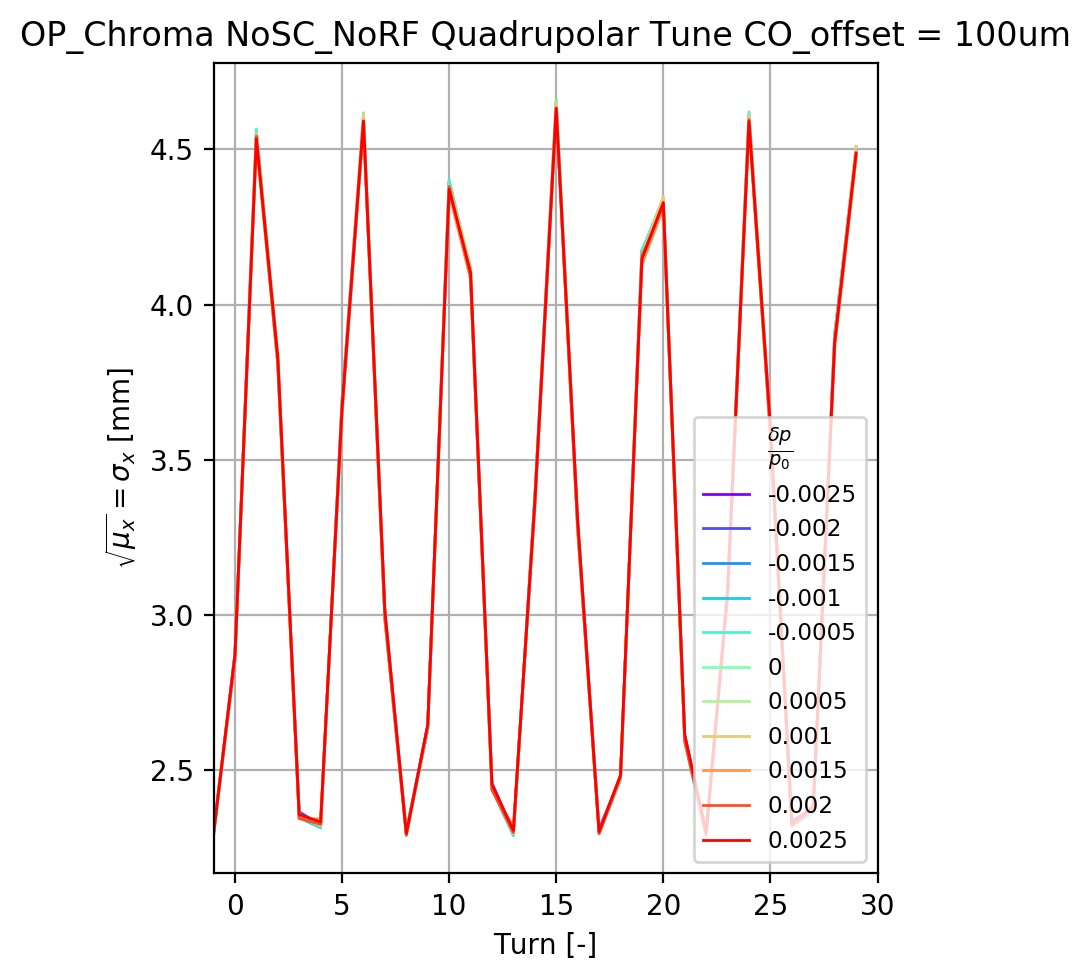

In [15]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Quadrupolar Tune CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
    print key
    print len(ddo[key]['turn'][0])
    ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

savename = save_folder + 'sig_x.png'
plt.tight_layout()
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [16]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []


 Momentum Offset =  -0.0025
 Offset =  3.2699244871945274  mm
 Amplitude =  1.1679279381210073  mm
 Frequency =  0.4996
 Phase offset =  0.2583289575216323

 Momentum Offset =  -0.002
 Offset =  3.2812529949837237  mm
 Amplitude =  1.177337345259277  mm
 Frequency =  0.4996
 Phase offset =  0.25800010412578206

 Momentum Offset =  -0.0015
 Offset =  3.2690810352573623  mm
 Amplitude =  1.1667348967303726  mm
 Frequency =  0.4996
 Phase offset =  0.258211807370164

 Momentum Offset =  -0.001
 Offset =  3.2683457411799135  mm
 Amplitude =  1.1763898332996867  mm
 Frequency =  0.4996
 Phase offset =  0.2579305233154101

 Momentum Offset =  -0.0005
 Offset =  3.2805586635043267  mm
 Amplitude =  1.1844809359842399  mm
 Frequency =  0.4996
 Phase offset =  0.2581775049295688

 Momentum Offset =  0
 Offset =  3.2682096460048378  mm
 Amplitude =  1.1715908782166586  mm
 Frequency =  0.4996
 Phase offset =  0.25824053088725063

 Momentum Offset =  0.0005
 Offset =  3.268107758678955  mm
 Ampl

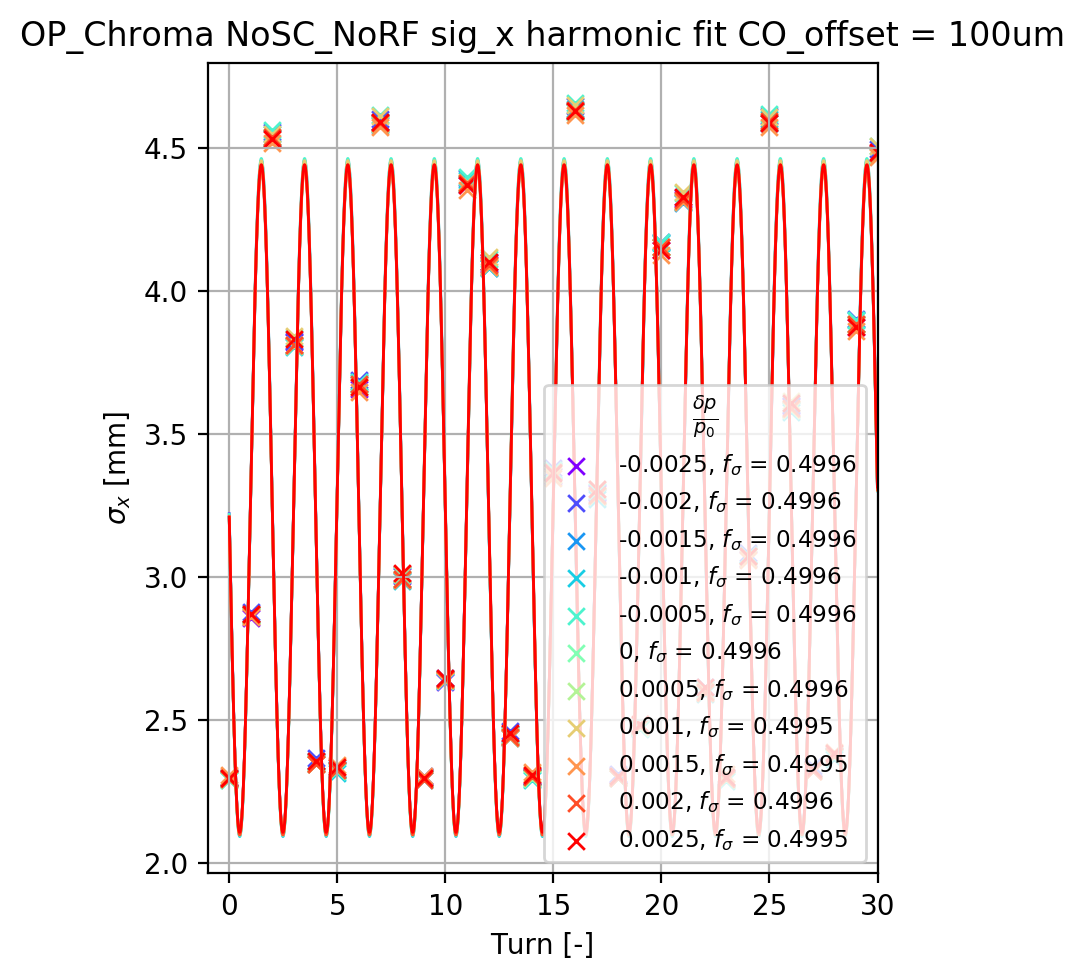

In [17]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)    
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.99

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  3.047989474548714  mm
 Amplitude =  0.0254736032754978  mm
 Frequency =  0.5141
 Phase offset =  0.05903740899103624

 Momentum Offset =  -0.002
 Offset =  3.045952971252172  mm
 Amplitude =  0.014564390505959588  mm
 Frequency =  0.5142
 Phase offset =  -0.03424415174685185

 Momentum Offset =  -0.0015
 Offset =  3.05039582471936  mm
 Amplitude =  0.01710937444375369  mm
 Frequency =  0.5159
 Phase offset =  0.041343991461781346

 Momentum Offset =  -0.001
 Offset =  3.047702877789117  mm
 Amplitude =  0.02320173146896785  mm
 Frequency =  0.5161
 Phase offset =  0.0338895916279317

 Momentum Offset =  -0.0005
 Offset =  3.0465660258065226  mm
 Amplitude =  0.01705000205277492  mm
 Frequency =  0.5161
 Phase offset =  0.01813035569823396

 Momentum Offset =  0
 Offset =  3.059385263953696  mm
 Amplitude =  0.01056659534398476  mm
 Frequency =  0.512
 Phase offset =  0.028990603316637057

 Momentum Offset =  0.0005
 Offset =  3.0444938753053865  

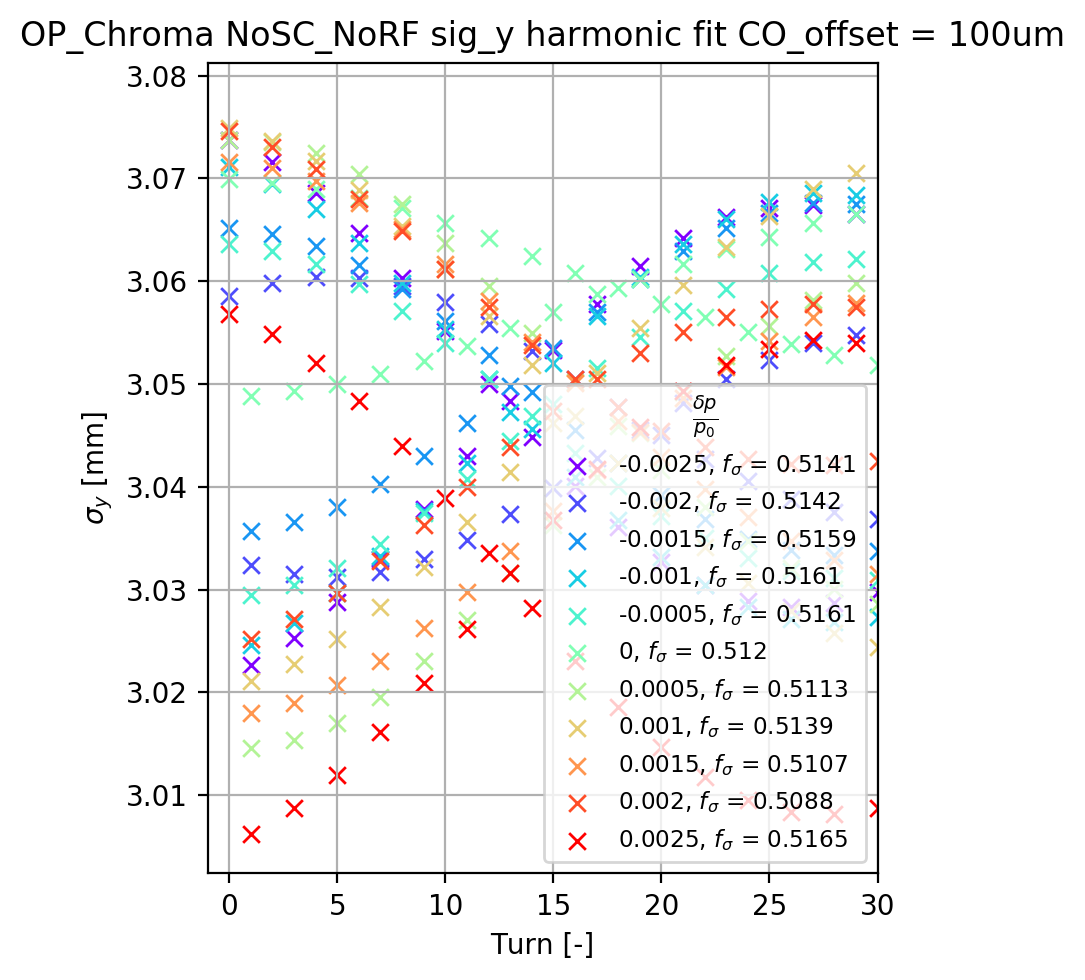

In [18]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.99

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    #ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -0.6440672469166797  mm
 Amplitude =  0.2065891943069309  mm
 Frequency =  0.2161
 Phase offset =  0.8536104861392814

 Momentum Offset =  -0.002
 Offset =  -0.6497221956955269  mm
 Amplitude =  0.2201679980161548  mm
 Frequency =  0.215
 Phase offset =  0.9008369776240017

 Momentum Offset =  -0.0015
 Offset =  -0.6519680399939828  mm
 Amplitude =  0.21114556890500003  mm
 Frequency =  0.2156
 Phase offset =  0.8774414120609095

 Momentum Offset =  -0.001
 Offset =  -0.6480864984529685  mm
 Amplitude =  0.21428246199383663  mm
 Frequency =  0.2173
 Phase offset =  0.8102723286977994

 Momentum Offset =  -0.0005
 Offset =  -0.6447532846389179  mm
 Amplitude =  0.21628290180290569  mm
 Frequency =  0.2161
 Phase offset =  0.8586077713844765

 Momentum Offset =  0
 Offset =  -0.6557587478112716  mm
 Amplitude =  0.2176581477345513  mm
 Frequency =  0.215
 Phase offset =  0.8993139112799207

 Momentum Offset =  0.0005
 Offset =  -0.6509253889849131 

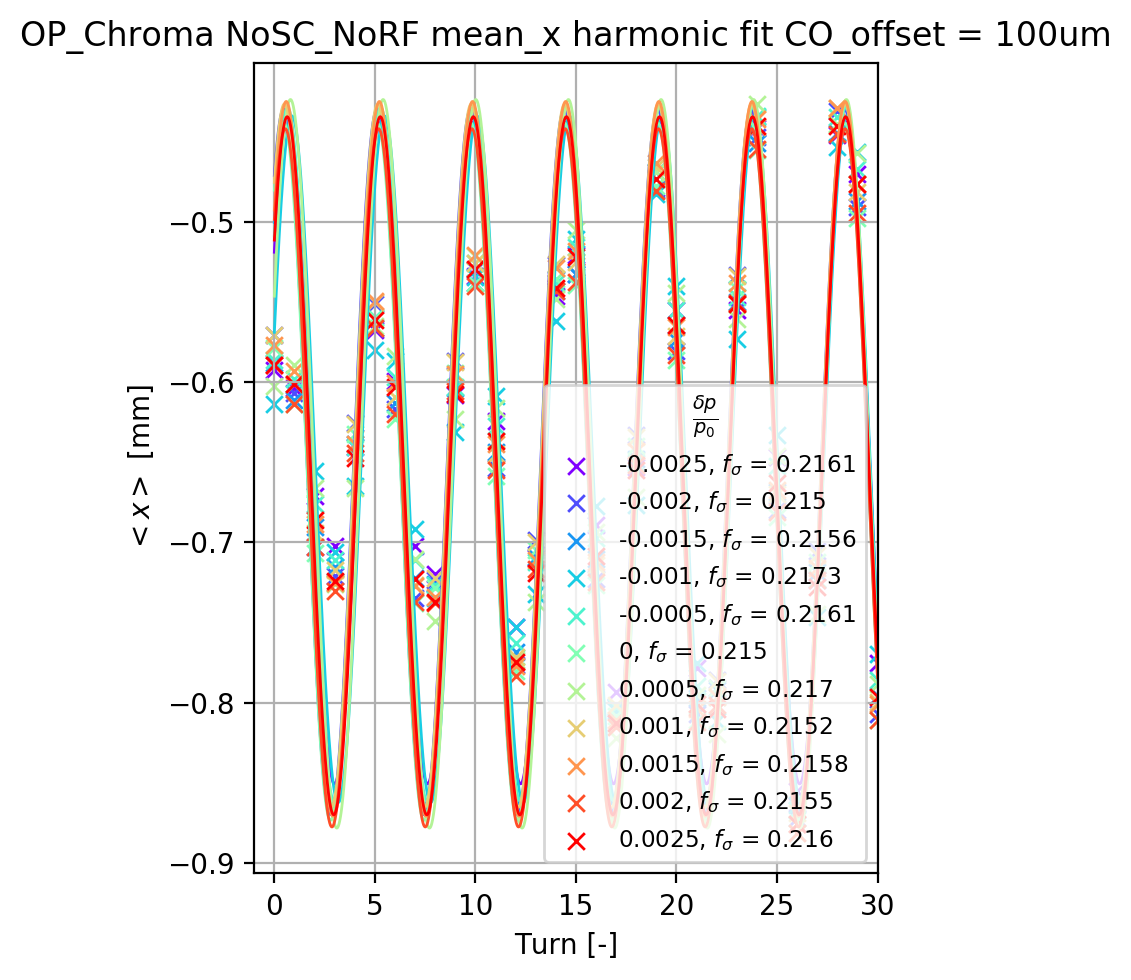

In [19]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.49

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  0.0013304784062036002  mm
 Amplitude =  0.0986841105735135  mm
 Frequency =  0.2426
 Phase offset =  0.010010351648582211

 Momentum Offset =  -0.002
 Offset =  0.001750343446270814  mm
 Amplitude =  0.09680585940274983  mm
 Frequency =  0.2426
 Phase offset =  -0.03268696453105313

 Momentum Offset =  -0.0015
 Offset =  0.0017757291328704412  mm
 Amplitude =  0.11756839033520364  mm
 Frequency =  0.2425
 Phase offset =  -0.0051935497437108165

 Momentum Offset =  -0.001
 Offset =  0.001881292376004589  mm
 Amplitude =  0.11454773723486422  mm
 Frequency =  0.243
 Phase offset =  -0.024102074499426345

 Momentum Offset =  -0.0005
 Offset =  0.001147161089787968  mm
 Amplitude =  0.07841370696607725  mm
 Frequency =  0.2423
 Phase offset =  -0.005181565948171872

 Momentum Offset =  0
 Offset =  0.0013080007626360295  mm
 Amplitude =  0.09522447778550876  mm
 Frequency =  0.2425
 Phase offset =  0.004536231003907271

 Momentum Offset =  0.0005
 Of

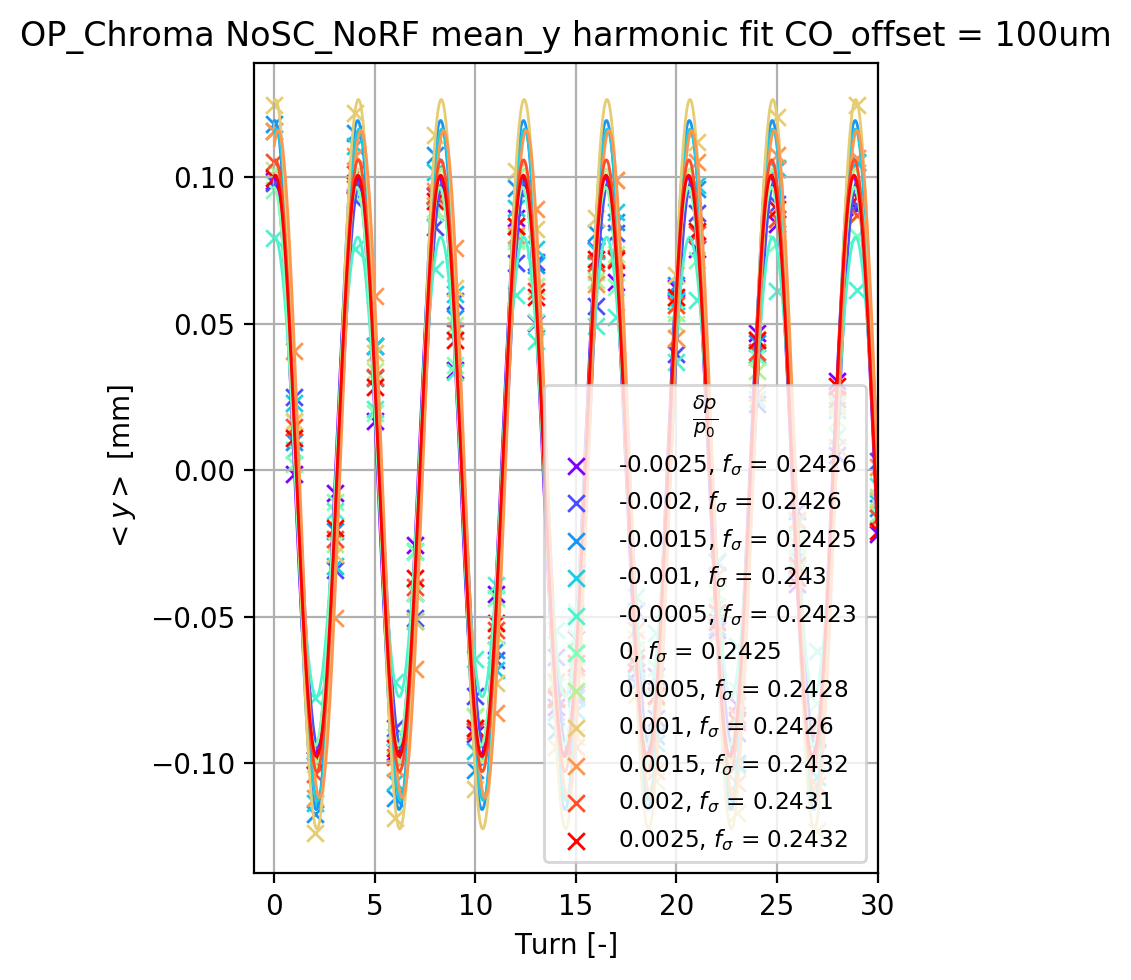

In [20]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


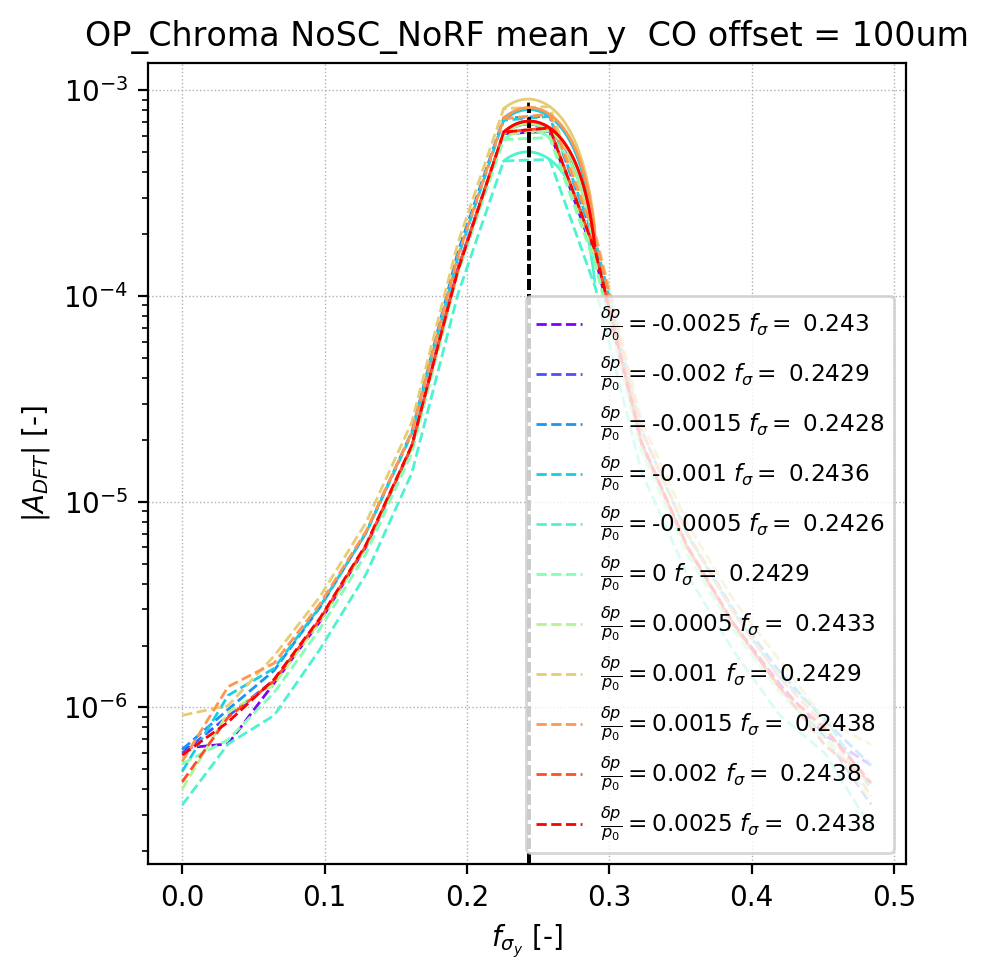

In [21]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

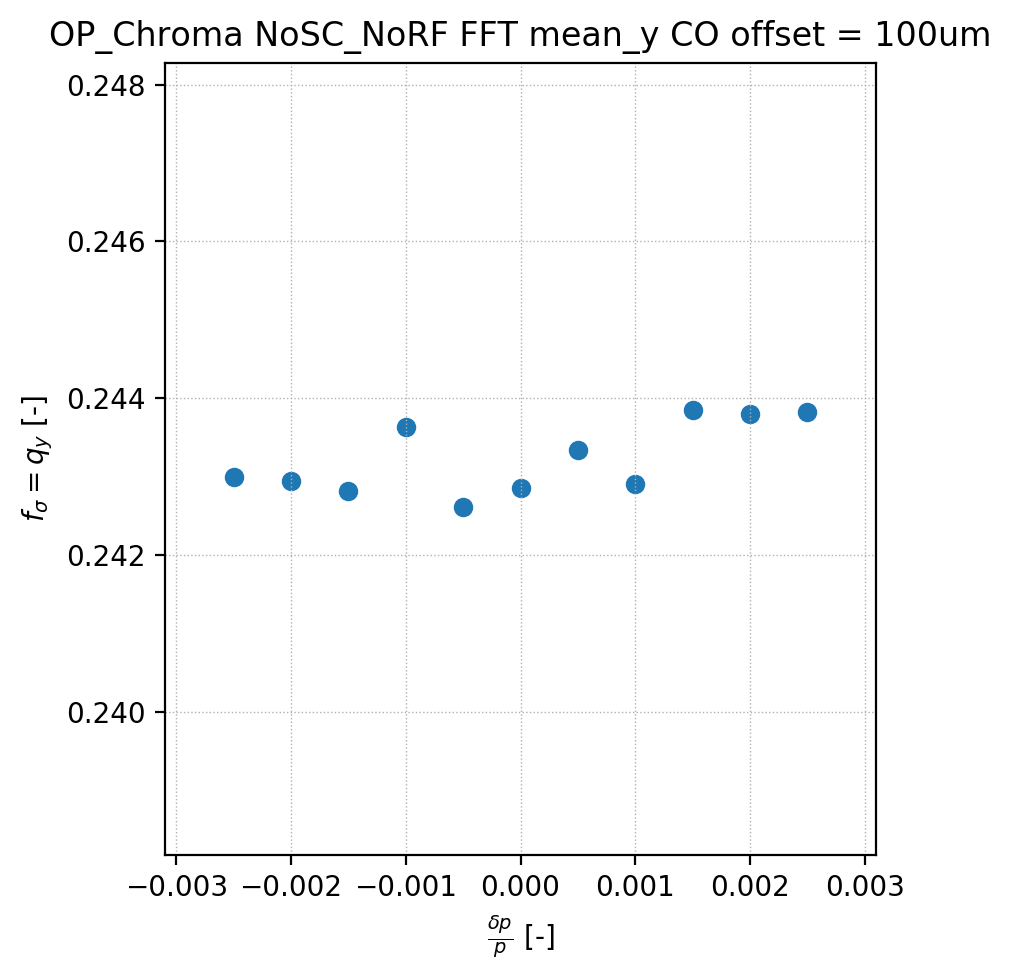

In [22]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_y CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-2.5E-3, -2E-3, -1.5E-3, -1E-3, -0.5E-3, 0, 0.5E-3, 1E-3, 1.5E-3, 2E-3, 2.5E-3]

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

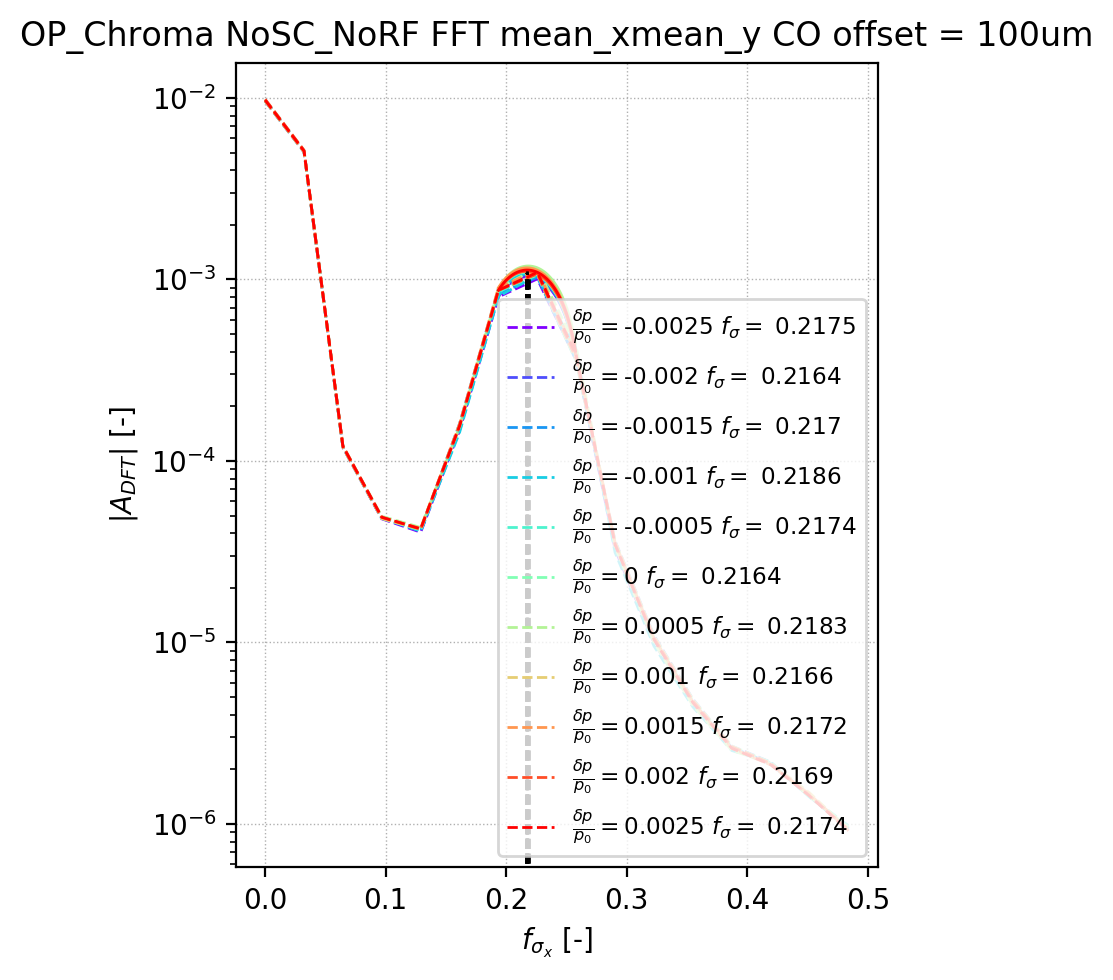

In [23]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' FFT mean_x' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

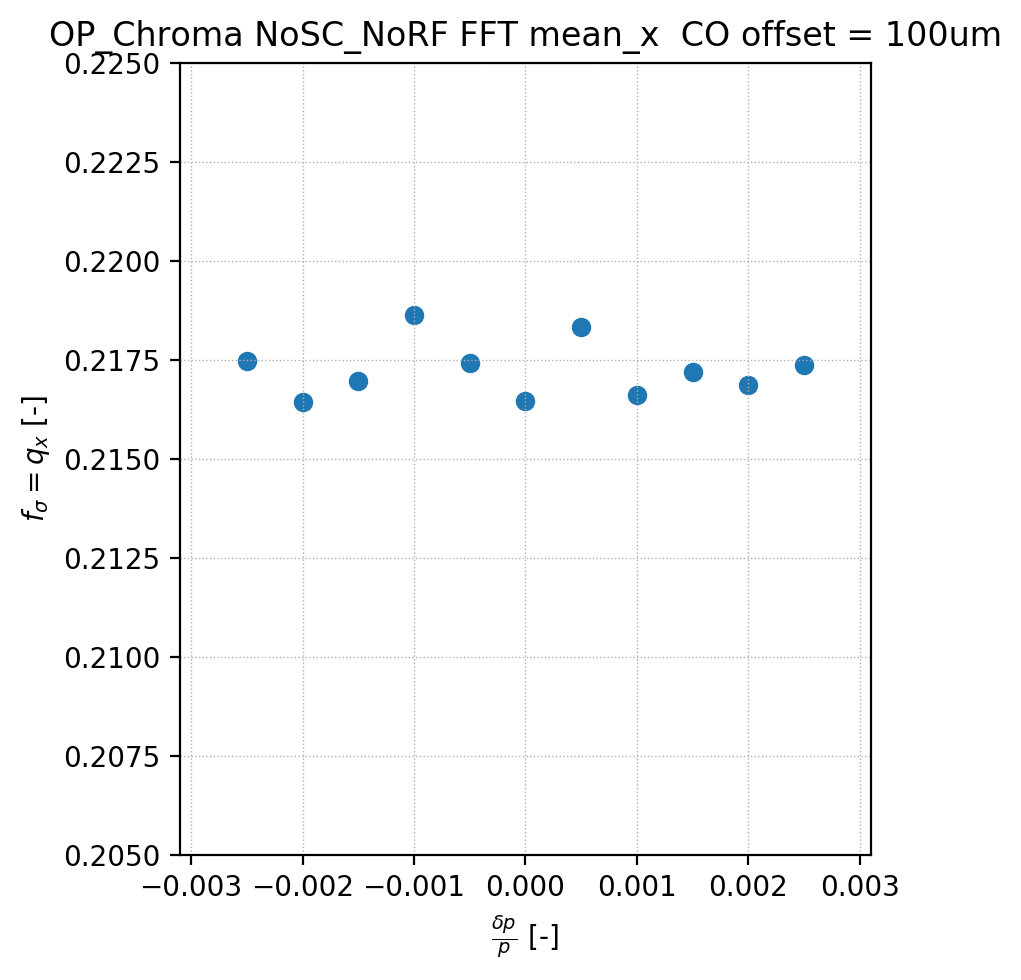

In [24]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_x  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-2.5E-3, -2E-3, -1.5E-3, -1E-3, -0.5E-3, 0, 0.5E-3, 1E-3, 1.5E-3, 2E-3, 2.5E-3]
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

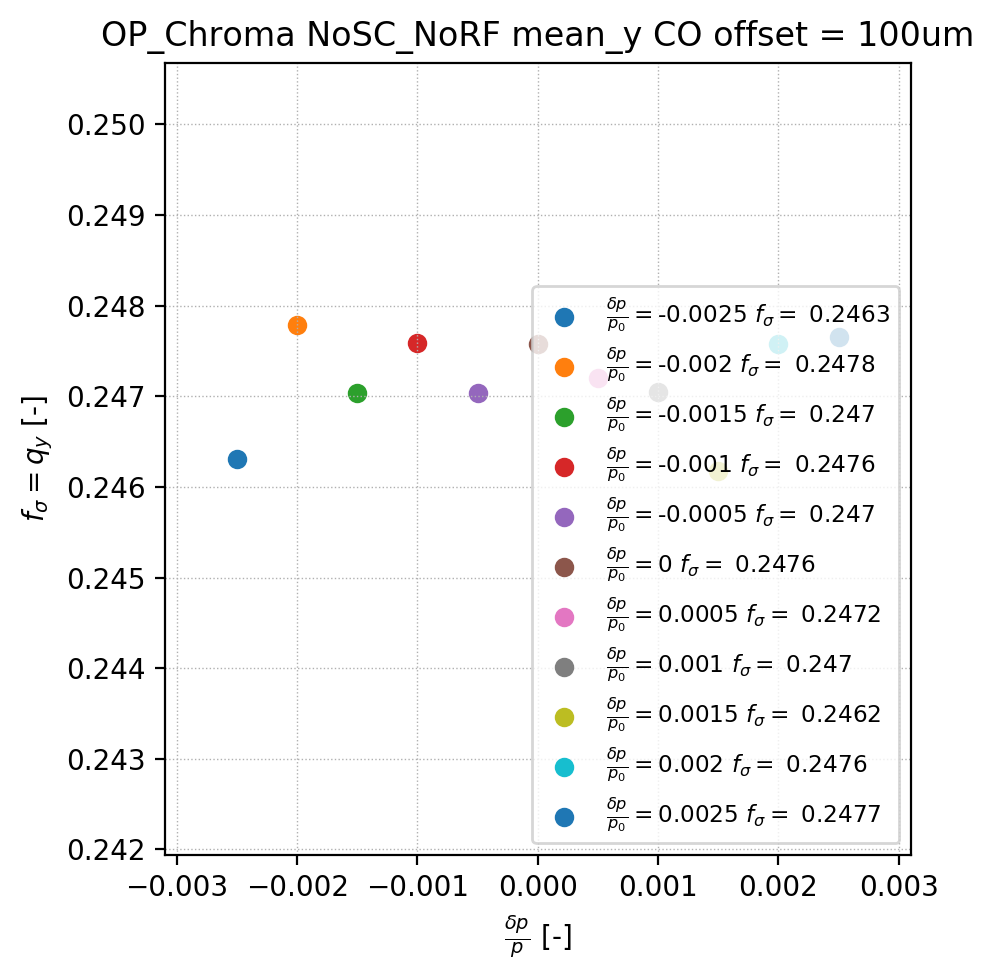

In [25]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 4
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        if key == 0.0: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.001: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.002: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.003: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        #print skiptrns
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

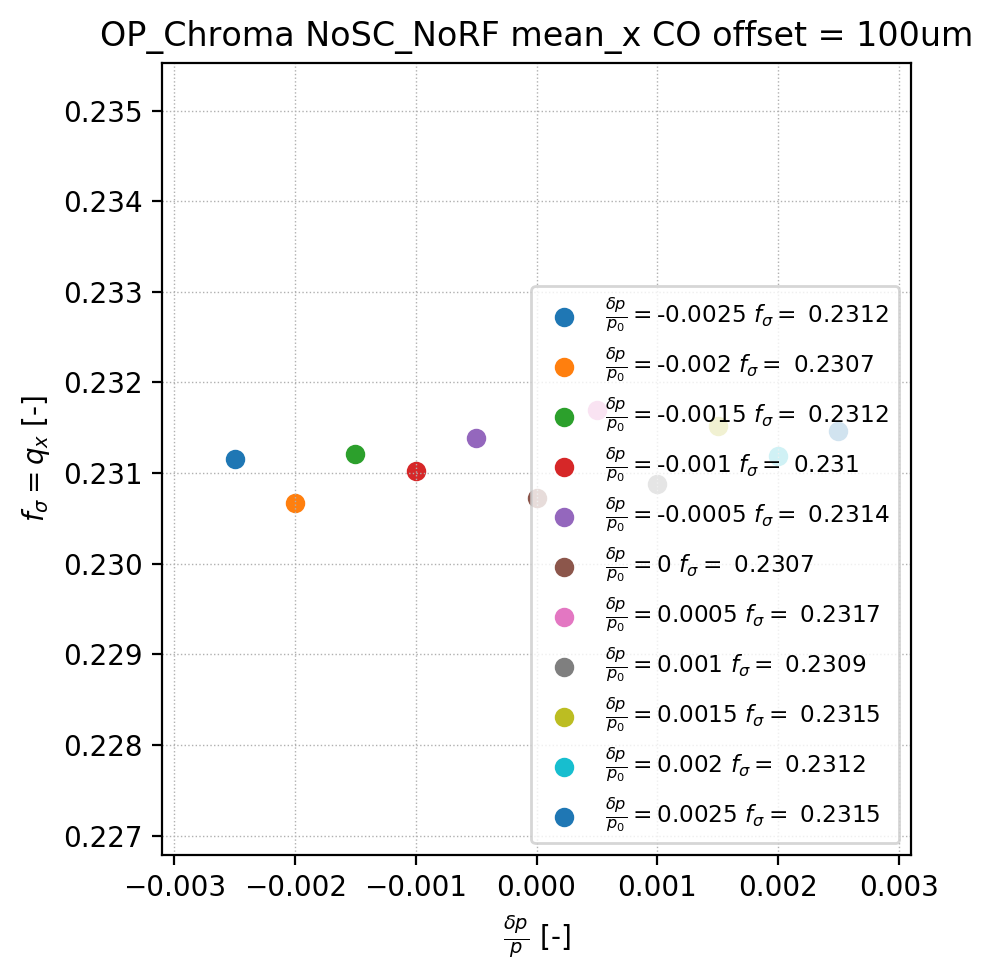

In [26]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

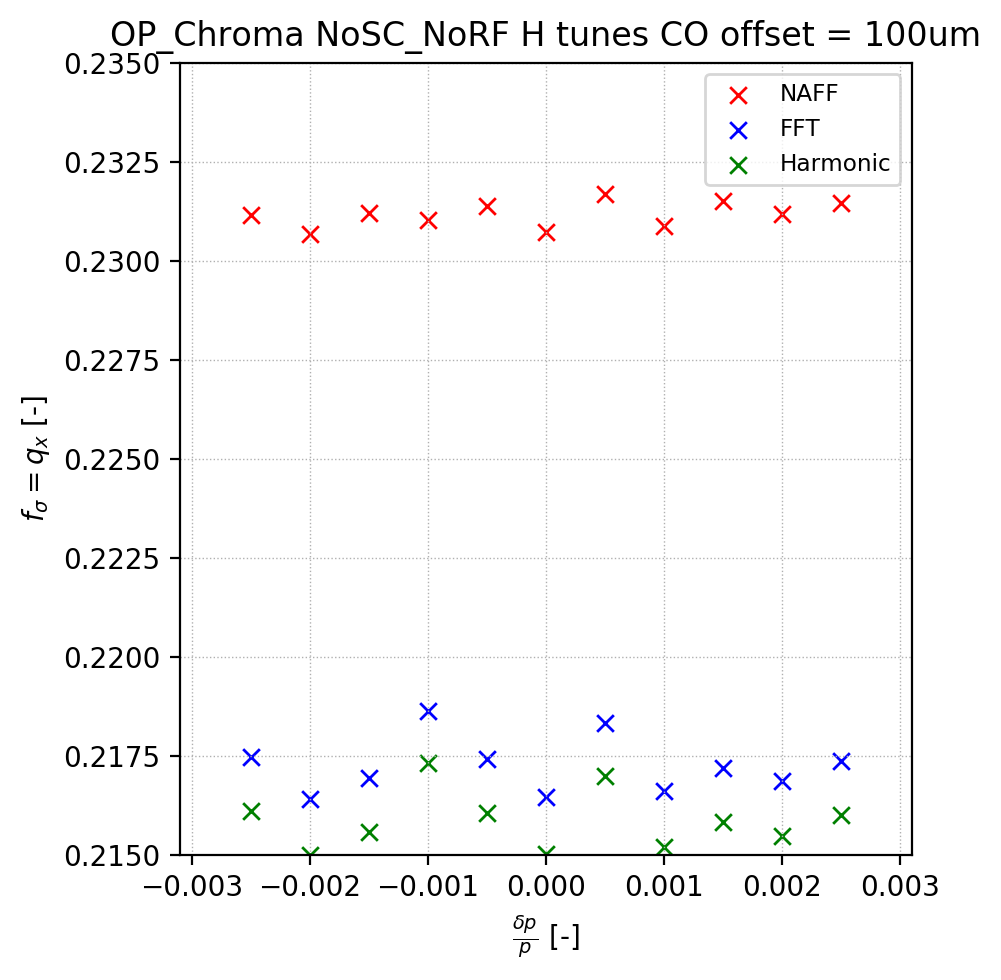

In [27]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' H tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.215, 0.235);

dps = [-2.5E-3, -2E-3, -1.5E-3, -1E-3, -0.5E-3, 0, 0.5E-3, 1E-3, 1.5E-3, 2E-3, 2.5E-3]

ax1.scatter(dps, qx_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qx_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

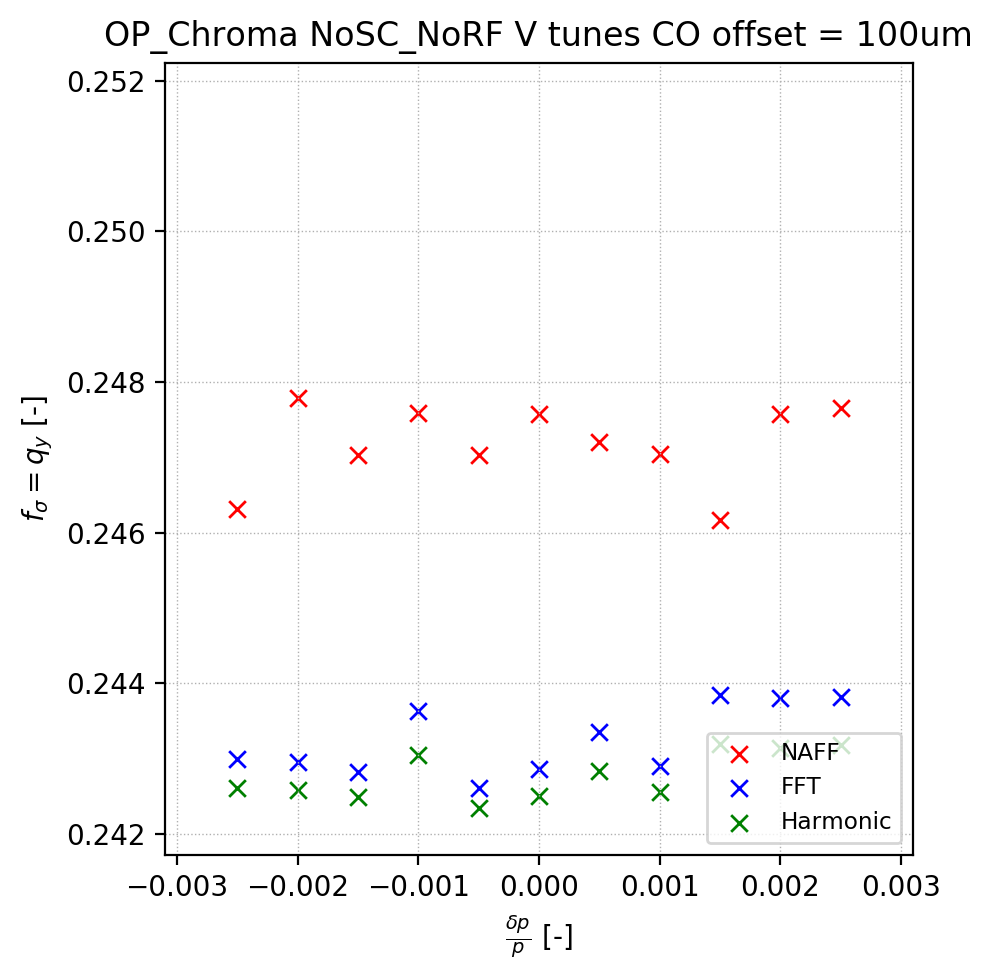

In [28]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' V tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

dps = [-2.5E-3, -2E-3, -1.5E-3, -1E-3, -0.5E-3, 0, 0.5E-3, 1E-3, 1.5E-3, 2E-3, 2.5E-3]

ax1.scatter(dps, qy_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qy_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qy_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);